#Installing and Importing Libraries

I used Pandas for tablular data and statistical operations, NumPy/Scipy for statistical analysis, and Matplotlib for plotting the data.



In [1]:
#Import libraries
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [2]:
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Reading the webpage and parsing it with BeautifulSoup

In [3]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


#Data Extraction, Transformation, Loading Process

I created the function *clean_list* to clean up the data and remove empty lines.

In [4]:
def clean_list(str_list):
  str_list[:] = [x for x in str_list if x]
  return str_list

raw_data = []


#Extract

Extracting data from the webpage (https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table)

In [5]:
table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

raw_data = raw_data[1]



#Transform

I defined a list of columns and stored the column names in a list. I also converted the data into a dataframe so that I could do some additional cleaning and apply more transformation operations.  

In [6]:
final_data = []
rows = raw_data.split("\n\n\n")
rows = rows[20:]

for row in rows:
  row = row.strip()
  columns = row.split("\n")
  columns = clean_list(columns)
  final_data.append(columns)


column_names = ["Team (IOC code)", "No. Summer Games",
           "No. Summer Gold Medals","No. Summer Silver Medals",
           "No. Summer Bronze Medals","Total Summer Medals","No. Winter Games",
           "No. Winter Gold Medals","No. Winter Silver Medals",
           "No. Winter Bronze Medals","Total Winter Medals",
           "No. Combined Games","No. Combined Gold Medals",
           "No. Combined Silver Medals","No. Combined Bronze Medals",
           "No. Total Combined Medals"]

df = pd.DataFrame(final_data, columns = column_names)

df


,Team (IOC code),No. Summer Games,No. Summer Gold Medals,No. Summer Silver Medals,No. Summer Bronze Medals,Total Summer Medals,No. Winter Games,No. Winter Gold Medals,No. Winter Silver Medals,No. Winter Bronze Medals,Total Winter Medals,No. Combined Games,No. Combined Gold Medals,No. Combined Silver Medals,No. Combined Bronze Medals,No. Total Combined Medals
0,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Zimbabwe (ZIM) [ZIM],14,3,4,1,8,1,0,0,0,0,15,3,4,1,8
153,Independent Olympic Athletes (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
154,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
155,Mixed team (ZZX) [ZZX],3,11,6,8,25,0,0,0,0,0,3,11,6,8,25


#Load

I converted the data into a csv.

In [7]:
df.to_csv('medals_df.csv')

In [8]:
encoded_df = pd.DataFrame(pd.read_csv("medals_df.csv"))
encoded_df.head()

,Unnamed: 0,Team (IOC code),No. Summer Games,No. Summer Gold Medals,No. Summer Silver Medals,No. Summer Bronze Medals,Total Summer Medals,No. Winter Games,No. Winter Gold Medals,No. Winter Silver Medals,No. Winter Bronze Medals,Total Winter Medals,No. Combined Games,No. Combined Gold Medals,No. Combined Silver Medals,No. Combined Bronze Medals,No. Total Combined Medals
0,0,Afghanistan (AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,1,Algeria (ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,2,Argentina (ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,3,Armenia (ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [9]:
encoded_df.info()
#no null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  157 non-null    int64 
 1   Team (IOC code)             157 non-null    object
 2   No. Summer Games            157 non-null    int64 
 3   No. Summer Gold Medals      157 non-null    object
 4   No. Summer Silver Medals    157 non-null    object
 5   No. Summer Bronze Medals    157 non-null    object
 6   Total Summer Medals         157 non-null    object
 7   No. Winter Games            157 non-null    int64 
 8   No. Winter Gold Medals      157 non-null    object
 9   No. Winter Silver Medals    157 non-null    object
 10  No. Winter Bronze Medals    157 non-null    object
 11  Total Winter Medals         157 non-null    object
 12  No. Combined Games          157 non-null    int64 
 13  No. Combined Gold Medals    157 non-null    object

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame.from_dict(encoded_df)
team_code = df["Team (IOC code)"]
total_medals = df["No. Total Combined Medals"]

Here, I made sure that the total number of combined medals to numeric data and sorted the data in top 5 by descending order. Then, I got the team codes and total medals for the the top 5 teams. I got the names, code, and total medals for the top 5 teams then displayed the output.

In [14]:
df['No. Total Combined Medals'] = pd.to_numeric(df['No. Total Combined Medals'], errors='coerce')

top_5_teams = df.nlargest(5, 'No. Total Combined Medals')

selected_team = top_5_teams["Team (IOC code)"]
selected_medals = top_5_teams["No. Total Combined Medals"]

output_df = pd.DataFrame({"Team Code": selected_team, "Total Medals": selected_medals})

print(output_df)

                        Team Code  Total Medals
51  Great Britain (GBR) [GBR] [Z]         950.0
46        Germany (GER) [GER] [Z]         922.0
43       France (FRA) [O] [P] [Z]         889.0
66            Italy (ITA) [M] [S]         759.0
24              China (CHN) [CHN]         713.0


#Visualization & Analysis

For the visualization, I decided to use a bar plot. To make the plot easier to understand, I decided to use only the combined medals data and the top 5 countries in the bar graph.

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7904d60dcf10>,
 [Text(0.0, 0, 'Great Britain'),
  Text(1.0, 0, 'Germany'),
  Text(2.0, 0, 'France'),
  Text(3.0, 0, 'Italy'),
  Text(4.0, 0, 'China')])

Text(0.5, 0, 'Team Country')

Text(0, 0.5, 'Total combined medals')

Text(0.5, 1.0, 'Top 5 Countries with most combined medals ')

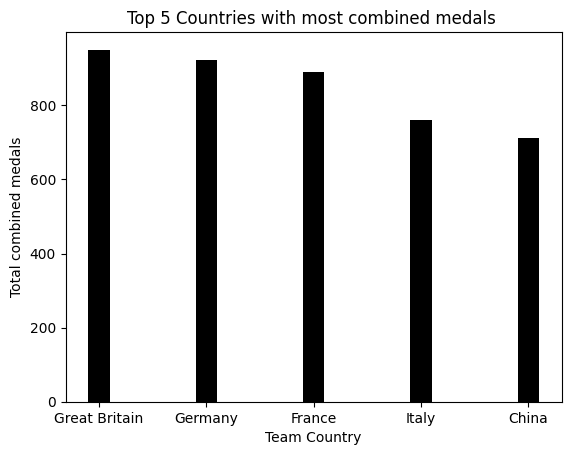

In [13]:
# creating the bar plot
plt.bar(selected_team, selected_medals, color='black', width=0.2)

# setting custom names for each bar, just name of country
custom_labels = ["Great Britain", "Germany", "France", "Italy", "China"]
plt.xticks(selected_team, custom_labels)


# adding axis labels
plt.xlabel("Team Country")
plt.ylabel("Total combined medals")

# title of graph
plt.title("Top 5 Countries with most combined medals ")

# display plot
plt.show()

<describe the graph>